In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yfin
yfin.pdr_override()

In [2]:
data = pdr.DataReader('RELIANCE.NS', source = 'yahoo', start = '2017-1-1')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,536.910645,539.882446,531.140320,537.455444,523.695190,3275674
2017-01-03,539.808167,543.349609,535.474243,539.585266,525.770447,2969384
2017-01-04,541.318848,541.368347,527.153137,528.564758,515.032166,4796129
2017-01-05,530.471680,534.879883,529.357239,533.641602,519.979065,4030815
2017-01-06,532.056641,537.405945,531.511780,532.428101,518.796570,3620853
...,...,...,...,...,...,...
2022-03-02,2334.449951,2401.000000,2329.199951,2398.550049,2398.550049,9909226
2022-03-03,2400.000000,2414.850098,2370.050049,2378.300049,2378.300049,4701183
2022-03-04,2353.000000,2364.300049,2320.350098,2325.550049,2325.550049,4986814


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,536.910645,539.882446,531.140320,537.455444,523.695190,3275674
2017-01-03,539.808167,543.349609,535.474243,539.585266,525.770447,2969384
2017-01-04,541.318848,541.368347,527.153137,528.564758,515.032166,4796129
2017-01-05,530.471680,534.879883,529.357239,533.641602,519.979065,4030815
2017-01-06,532.056641,537.405945,531.511780,532.428101,518.796570,3620853


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1281 entries, 2017-01-02 to 2022-03-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1281 non-null   float64
 1   High       1281 non-null   float64
 2   Low        1281 non-null   float64
 3   Close      1281 non-null   float64
 4   Adj Close  1281 non-null   float64
 5   Volume     1281 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 70.1 KB


In [5]:
prices = data['Adj Close']

prices

Date
2017-01-02     523.695190
2017-01-03     525.770447
2017-01-04     515.032166
2017-01-05     519.979065
2017-01-06     518.796570
                 ...     
2022-03-02    2398.550049
2022-03-03    2378.300049
2022-03-04    2325.550049
2022-03-07    2239.550049
2022-03-08    2235.500000
Name: Adj Close, Length: 1281, dtype: float64

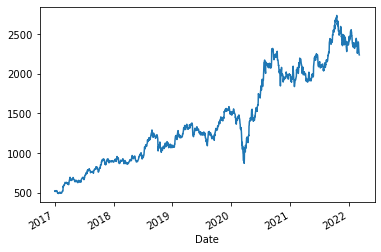

In [6]:
prices.plot()
plt.show()

In [7]:
prices = prices.to_frame()

In [8]:
prices['7_Day_MA'] = (prices['Adj Close'] + prices['Adj Close'].shift(1) + prices['Adj Close'].shift(2) + prices['Adj Close'].shift(3) + prices['Adj Close'].shift(4) + prices['Adj Close'].shift(5) + prices['Adj Close'].shift(6))/7
prices

,Adj Close,7_Day_MA
Date,,
2017-01-02,523.695190,NaN
2017-01-03,525.770447,NaN
2017-01-04,515.032166,NaN
2017-01-05,519.979065,NaN
2017-01-06,518.796570,NaN
...,...,...
2022-03-02,2398.550049,2351.535714
2022-03-03,2378.300049,2348.450021
2022-03-04,2325.550049,2339.385742


In [9]:
# Calculating the Beta of the stock and then the expected rate of return and finally the sharpe ratio.

tickers = ['RELIANCE.NS','^NSEI']
data3 = pd.DataFrame()
for t in tickers:
    data3[t] = pdr.DataReader(t, start = '2017-1-1', source = 'yahoo')['Adj Close']
data3

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,RELIANCE.NS,^NSEI
Date,,
2017-01-02,523.695251,8179.500000
2017-01-03,525.770447,8192.250000
2017-01-04,515.032166,8190.500000
2017-01-05,519.979004,8273.799805
2017-01-06,518.796570,8243.799805
...,...,...
2022-03-02,2398.550049,16605.949219
2022-03-03,2378.300049,16498.050781
2022-03-04,2325.550049,16245.349609


In [10]:
log_rets = np.log(data3/data3.shift(1))
log_rets

,RELIANCE.NS,^NSEI
Date,,
2017-01-02,NaN,NaN
2017-01-03,0.003955,0.001558
2017-01-04,-0.020635,-0.000214
2017-01-05,0.009559,0.010119
2017-01-06,-0.002277,-0.003632
...,...,...
2022-03-02,0.016393,-0.011255
2022-03-03,-0.008478,-0.006519
2022-03-04,-0.022429,-0.015436


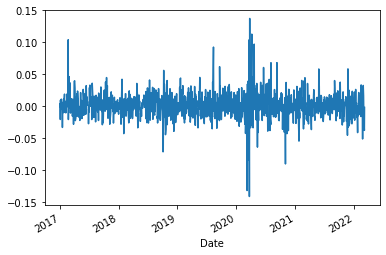

In [11]:
log_rets['RELIANCE.NS'].plot()
plt.show()

In [12]:
#250, because that is the amount of days the stock market opens on average in a year
cov = log_rets.cov()*250
cov

,RELIANCE.NS,^NSEI
RELIANCE.NS,0.096427,0.037645
^NSEI,0.037645,0.034524


In [13]:
cov_with_market = cov.iloc[0,1]
cov_with_market

0.037644833342711764

In [14]:
market_var = log_rets['^NSEI'].var()*250
market_var

0.0345242563476317

In [15]:
rel_beta = cov_with_market/market_var
rel_beta

1.0903879569094364

In [16]:
#calculating risk free premium
rfm = log_rets['^NSEI'].mean()*250
rfm

0.12918341329734476

In [17]:
exp_ret = 0.0675 + rel_beta*(rfm - 0.0675)
exp_ret

0.13475885100049212

In [18]:
#sharpe ratio

sr = (exp_ret - 0.0675)/(log_rets['RELIANCE.NS'].std()*250**0.5)
sr

0.2165958299847281

In [19]:
#Monte Carlo Simulation on Reliance Stock
from scipy.stats import norm

In [20]:
rel_mean_d = log_rets['RELIANCE.NS'].mean()
rel_var_d = log_rets['RELIANCE.NS'].var()

#drift = avg daily return + 1/2(Variance)

drift = rel_mean_d + 0.5*rel_var_d
drift

0.0013266901642460624

In [21]:
rel_std = log_rets['RELIANCE.NS'].std()

drift = np.array(drift)
rel_std = np.array(rel_std)


In [22]:
t_interval = 1000
iterations = 10
x = np.random.rand(t_interval, iterations)

daily_returns = np.exp(drift + rel_std*norm.ppf(x))


In [23]:
S0 = data3['RELIANCE.NS'].iloc[-1]
price = np.zeros_like(daily_returns)
price[0] = S0
price

array([[2235.5, 2235.5, 2235.5, ..., 2235.5, 2235.5, 2235.5],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       ...,
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ]])

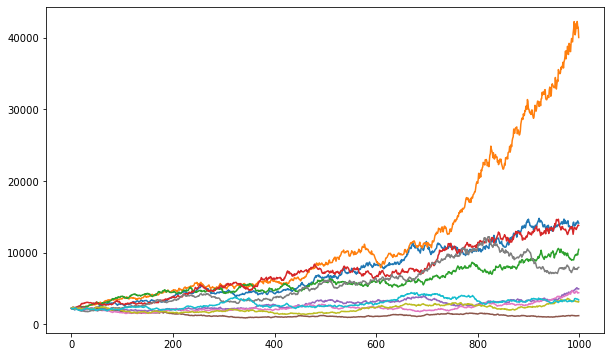

In [24]:
for t in range (1, t_interval):
    price[t] = price[t-1]*daily_returns[t]
    
plt.figure(figsize = (10,6))
plt.plot (price)